In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

game = pd.read_csv("subset.csv")

game = game.set_axis(['Winner', 'White_Weighted_Value', 'Black_Weighted_Value',
                     'White_Centre_Weighted_Value', 'Black_Centre_Weighted_Value',
                     'White_King_Safety', 'Black_King_Safety',
                     'White_Piece_Count', 'Black_Piece_Count',
                     'White_Center_Piece_Count', 'Black_Center_Piece_Count',
                     'White_Opponent_Moves', 'Black_Opponent_Moves',
                     'White_Rook_Positions', 'White_Queen_Positions',
                     'White_Knight_Positions', 'White_King_Positions', 'White_Bishop_Positions',
                     'Black_Rook_Positions', 'Black_Queen_Positions',
                     'Black_Knight_Positions', 'Black_King_Positions', 'Black_Bishop_Positions'], axis=1)
print(game)

# Pre-processing our engineered features (Y/N->0/1)
encoder = LabelEncoder()
game["White_King_Safety"] = encoder.fit_transform(game["White_King_Safety"])
game["Black_King_Safety"] = encoder.fit_transform(game["Black_King_Safety"])
game["Winner"] = encoder.fit_transform(game["Winner"])

# X(predictors), y (target)
X = game.drop(columns=["Winner"])
y = game["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an Original Decision Tree (J48) classifier
original_j48_classifier = DecisionTreeClassifier(random_state=42)

# Train the Original Decision Tree on the training data
original_j48_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_original = original_j48_classifier.predict(X_test)

# Evaluate the Original Decision Tree's accuracy and other metrics
accuracy_original = accuracy_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)
scores_original = cross_val_score(original_j48_classifier, X, y, cv=5, scoring='accuracy')
tree_depth_original = original_j48_classifier.get_depth()

# Generate a classification report for the Original Decision Tree
classification_rep_original = classification_report(y_test, y_pred_original)
conf_matrix_original = confusion_matrix(y_test, y_pred_original)

# Cost Complexity Pruning Path for the Original Decision Tree
path = original_j48_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Cross-validated errors for each alpha
errors = []
for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(pruned_tree, X_train, y_train, cv=5, scoring='accuracy')
    errors.append(1 - scores.mean())

# Find the alpha with the minimum cross-validated error
best_alpha = ccp_alphas[np.argmin(errors)]

# Prune the tree with the best alpha
pruned_j48_classifier = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_j48_classifier.fit(X_train, y_train)

# Make predictions on the test data with the Pruned Decision Tree
y_pred_pruned = pruned_j48_classifier.predict(X_test)

# Evaluate the Pruned Decision Tree's accuracy and other metrics
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
precision_pruned = precision_score(y_test, y_pred_pruned)
recall_pruned = recall_score(y_test, y_pred_pruned)
f1_pruned = f1_score(y_test, y_pred_pruned)
scores_pruned = cross_val_score(pruned_j48_classifier, X, y, cv=5, scoring='accuracy')
tree_depth_pruned = pruned_j48_classifier.get_depth()

# Generate a classification report for the Pruned Decision Tree
classification_rep_pruned = classification_report(y_test, y_pred_pruned)
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)

print("Original Decision Tree Metrics:")
print("Accuracy:", accuracy_original)
print("Precision:", precision_original)
print("Recall:", recall_original)
print("F1-Score:", f1_original)
print("Cross-Validation Scores:", scores_original)
print("Mean Accuracy:", scores_original.mean())
print("Tree Depth:", tree_depth_original)
print("Classification Report:\n", classification_rep_original)
print("Confusion Matrix:\n", conf_matrix_original)

print("\nPruned Decision Tree Metrics:")
print("Accuracy:", accuracy_pruned)
print("Precision:", precision_pruned)
print("Recall:", recall_pruned)
print("F1-Score:", f1_pruned)
print("Cross-Validation Scores:", scores_pruned)
print("Mean Accuracy:", scores_pruned.mean())
print("Pruned Tree Depth:", tree_depth_pruned)
print("Classification Report:\n", classification_rep_pruned)
print("Confusion Matrix:\n", conf_matrix_pruned)



      Winner  White_Weighted_Value  Black_Weighted_Value  \
0      Black                    18                    18   
1      White                    15                    15   
2      Black                    26                    26   
3      White                     4                     4   
4      White                    13                    13   
...      ...                   ...                   ...   
49994  Black                    20                    21   
49995  Black                    12                    13   
49996  Black                    14                    17   
49997  White                     8                     7   
49998  White                    16                    15   

       White_Centre_Weighted_Value  Black_Centre_Weighted_Value  \
0                                4                            2   
1                                6                            2   
2                                3                            1   
3          

In [5]:
%pip install seaborn

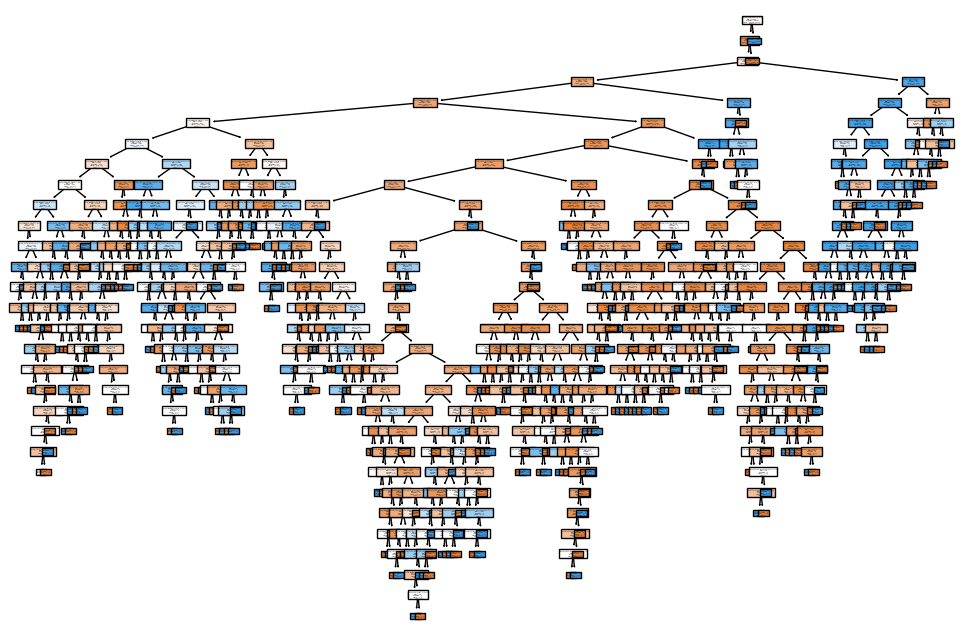

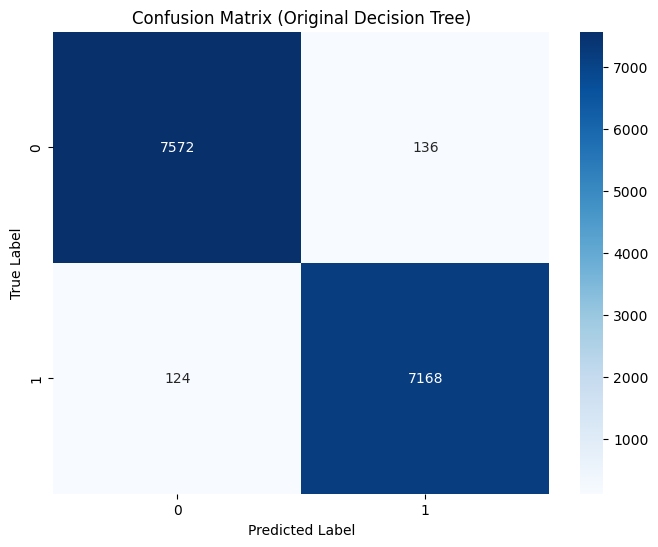

Original Decision Tree Metrics:
Accuracy: 0.9826666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7708
           1       0.98      0.98      0.98      7292

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000

Confusion Matrix:
 [[7572  136]
 [ 124 7168]]


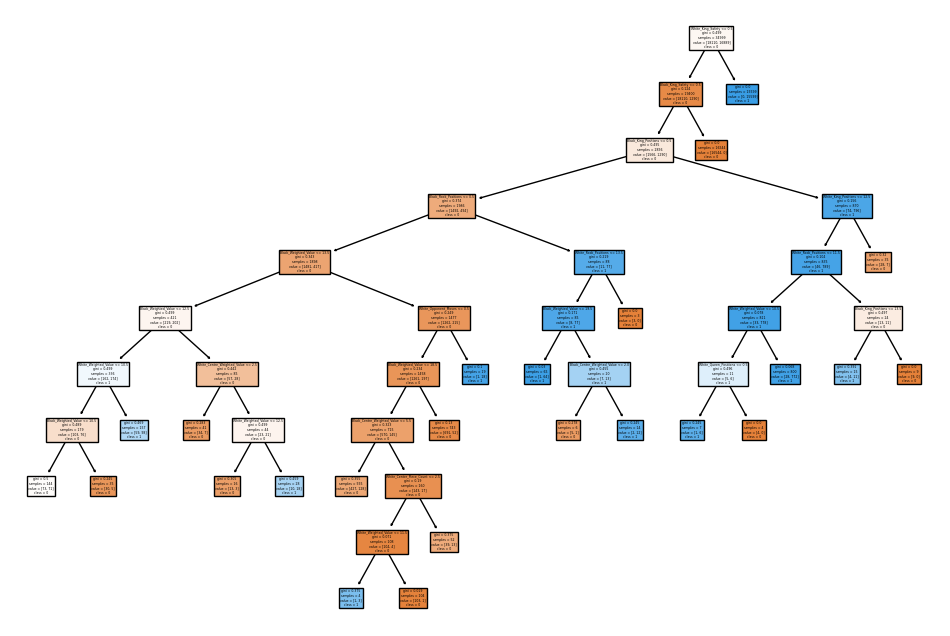

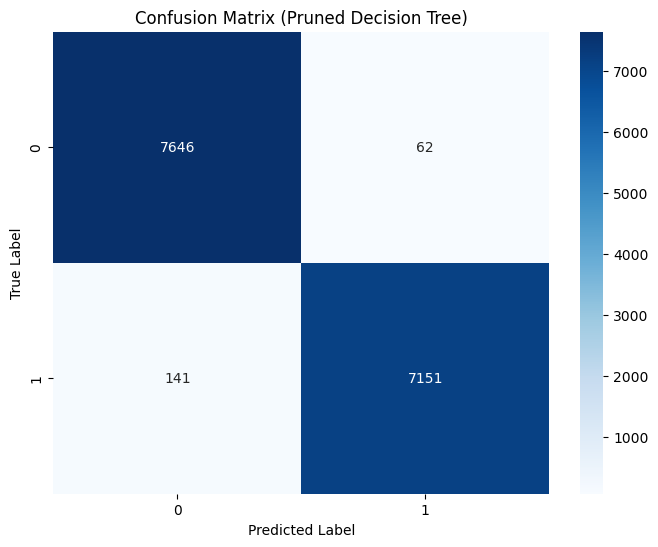


Pruned Decision Tree Metrics:
Accuracy: 0.9864666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      7708
           1       0.99      0.98      0.99      7292

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000

Confusion Matrix:
 [[7646   62]
 [ 141 7151]]
Cross-Validation Scores: [0.986      0.9877     0.9885     0.9869     0.98709871]
Mean Accuracy: 0.9872397419741974


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

game = pd.read_csv("subset.csv")

game = game.set_axis(['Winner', 'White_Weighted_Value', 'Black_Weighted_Value',
                     'White_Centre_Weighted_Value', 'Black_Centre_Weighted_Value',
                     'White_King_Safety', 'Black_King_Safety',
                     'White_Piece_Count', 'Black_Piece_Count',
                     'White_Center_Piece_Count', 'Black_Center_Piece_Count',
                     'White_Opponent_Moves', 'Black_Opponent_Moves',
                     'White_Rook_Positions', 'White_Queen_Positions',
                     'White_Knight_Positions', 'White_King_Positions', 'White_Bishop_Positions',
                     'Black_Rook_Positions', 'Black_Queen_Positions',
                     'Black_Knight_Positions', 'Black_King_Positions', 'Black_Bishop_Positions'], axis=1)

# Pre-processing our engineered features (Y/N->0/1)
encoder = LabelEncoder()
game["White_King_Safety"] = encoder.fit_transform(game["White_King_Safety"])
game["Black_King_Safety"] = encoder.fit_transform(game["Black_King_Safety"])
game["Winner"] = encoder.fit_transform(game["Winner"])

# X(predictors), y (target)
X = game.drop(columns=["Winner"])
y = game["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an Original Decision Tree (J48) classifier
original_j48_classifier = DecisionTreeClassifier(random_state=42)

# Train the Original Decision Tree on the training data
original_j48_classifier.fit(X_train, y_train)

# Plot the Original Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(original_j48_classifier, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()

# Make predictions on the test data
y_pred_original = original_j48_classifier.predict(X_test)

# Evaluate the Original Decision Tree's accuracy and other metrics
accuracy_original = accuracy_score(y_test, y_pred_original)
classification_rep_original = classification_report(y_test, y_pred_original)
conf_matrix_original = confusion_matrix(y_test, y_pred_original)

# Plot the Confusion Matrix for the Original Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_original, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix (Original Decision Tree)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Original Decision Tree Metrics:")
print("Accuracy:", accuracy_original)
print("Classification Report:\n", classification_rep_original)
print("Confusion Matrix:\n", conf_matrix_original)

# Cost Complexity Pruning Path for the Original Decision Tree
path = original_j48_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Cross-validated errors for each alpha
errors = []
for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(pruned_tree, X_train, y_train, cv=5, scoring='accuracy')
    errors.append(1 - scores.mean())

# Find the alpha with the minimum cross-validated error
best_alpha = ccp_alphas[np.argmin(errors)]

# Prune the tree with the best alpha
pruned_j48_classifier = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_j48_classifier.fit(X_train, y_train)

# Plot the Pruned Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(pruned_j48_classifier, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()

# Make predictions on the test data with the Pruned Decision Tree
y_pred_pruned = pruned_j48_classifier.predict(X_test)

# Evaluate the Pruned Decision Tree's accuracy and other metrics
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
classification_rep_pruned = classification_report(y_test, y_pred_pruned)
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)

# Plot the Confusion Matrix for the Pruned Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pruned, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix (Pruned Decision Tree)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Cross-validated accuracy for the Pruned Decision Tree
pruned_scores = cross_val_score(pruned_j48_classifier, X, y, cv=5, scoring='accuracy')

print("\nPruned Decision Tree Metrics:")
print("Accuracy:", accuracy_pruned)
print("Classification Report:\n", classification_rep_pruned)
print("Confusion Matrix:\n", conf_matrix_pruned)
print("Cross-Validation Scores:", pruned_scores)
print("Mean Accuracy:", pruned_scores.mean())

